# Discussion 8

### Due Friday Feb 28, 11:59:59PM

# Regression Review and Building Features
---

In [1]:
# import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import linregress

pd.set_option('display.max_column', 30)

# Review of Linear Regresssion


### Introduction

* A linear model posits a linear relationship between an independent variable `x` and a dependent variable `y`.
* Linear Regression is the *best* linear unbiased estimator for a given dataset.
    - 'Best' is measured in terms of *root mean squared error* (RMSE).

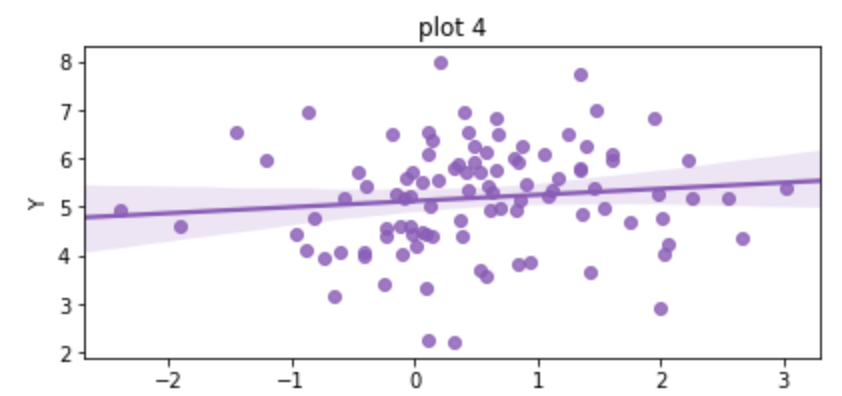


### Terms

* **Correlation Coefficient**: an amount that reflects the strength of linear association between the variables.
    * Values range between -1.0 and 1.0.
* **Slope**: the slope of the regression line.
* **Intercept**: the y-intercept of the regression line.

### Understanding 

* **Interpretation of Regression Line**: the line quantifies how `y` changes with a corresponding change in `x`.
* **Using Regression Line for Prediction**: the line can be used to approximate `y` values, given a *new* `x` value.
* **Residuals**: the errors in the predictions (i.e. the difference between the predicted values and the true values of `y`).

### Evaluating the regression model

While the regression line is the best linear predictor with respect to minimizing RMSE, it is not necessarily true that a *linear* model is the best model for a given prediction problem.

These all relate to questions of *inference*, and therefore the ability of a predictor to generalize:

* If a dataset captures a true linear relationship, then the residuals should show no patterns; there should be no bias in the errors. This can be assessed by viewing the **residual plot**:
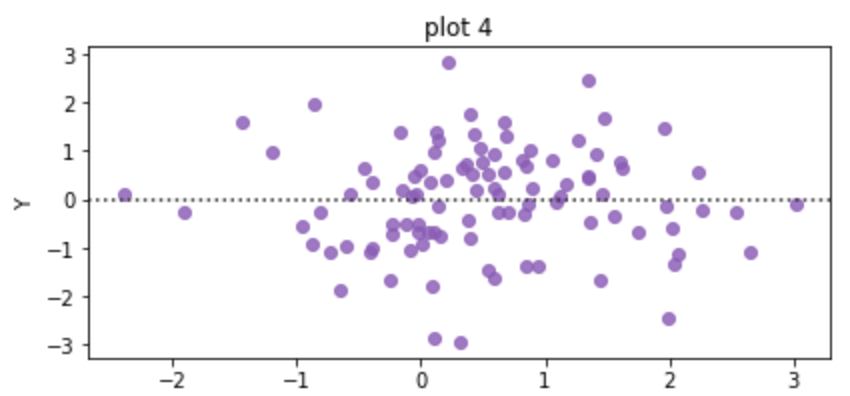
* **Heteroskadasticity**: are there subpopulations with varying levels of variability? The quality of the model may vary across the subpopulations (and thus be unreliable in the future).
* **Multicolinearity**: when fitting a multivariate linear regression model (e.g. a *plane* of best fit), the independent variables must be weakly correlated. Strongly correlated independent variables causes extreme sensitivity of the regression coefficients on the particulars of a given sample.
    - A different sample might drastically change the regression coefficients.

In [3]:
from glob import glob

datasets = {k:pd.read_csv(fp) for k, fp in enumerate(glob('data/*.csv'))}

### Plot the regression lines for each dataset below

The code below plots 7 datasets, with regression lines fit and plotted over their scatter-plot. The "band" around the regression line is a 95% prediction interval for predictions given by the linear model.

For each plot, try to answer the questions:
* Is a linear model a good choice for the dataset? Why? Why not?
* Is there a (strong) correlation between `X` and `Y`? Or are the variables uncorrelated?
* How good is the Root Mean Squared Error (RMSE) compared to the other datasets?

In [5]:
# datasets

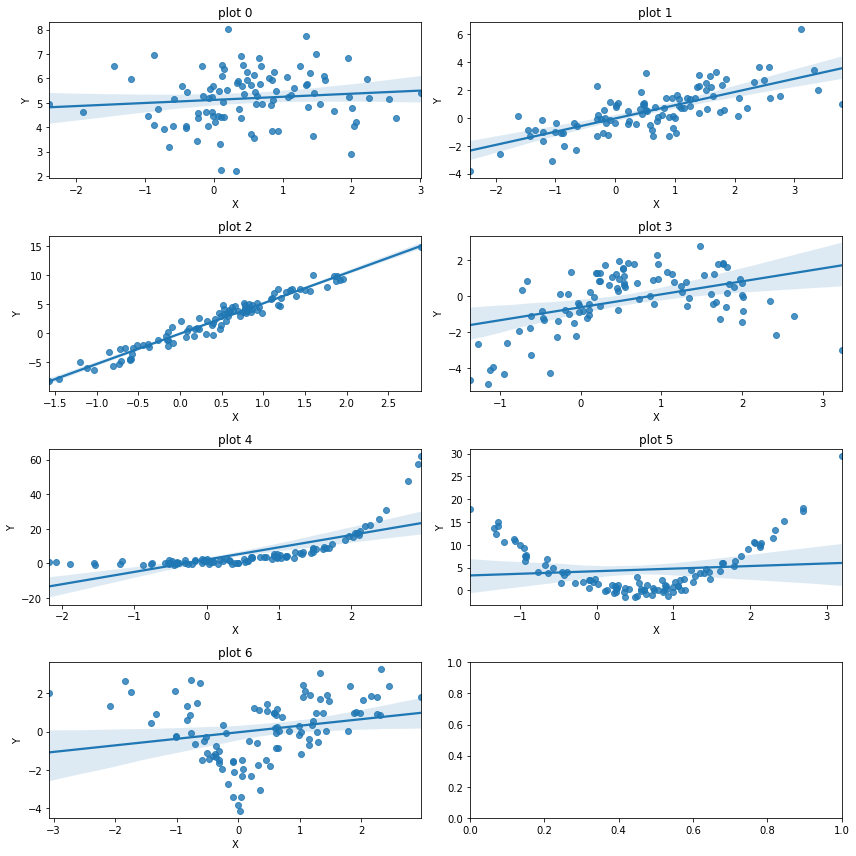

In [6]:
fig, axes = plt.subplots(4, 2, figsize=(12,12))

for k, v in datasets.items():
    ax = axes[k//2, k % 2]
    sns.regplot(data=v, x='X', y='Y', ax=ax)
    ax.set_title('plot %s' % k)
    
plt.tight_layout()

In [8]:
# for k, df in datasets.items():
#     print(df.corr())

In [9]:
for k, df in datasets.items():
    print(f'k = {k}, corr = {df.corr().iloc[0,1]}')

k = 0, corr = 0.11273924902306791
k = 1, corr = 0.7356698262737115
k = 2, corr = 0.9774796101469242
k = 3, corr = 0.43427123007042895
k = 4, corr = 0.7318504332118079
k = 5, corr = 0.1096621970632035
k = 6, corr = 0.23088181060525254


### Calculating the RMSE

Calculate the RMSE of each regression line. Put your answer in a function `rmse` that takes in the dictionary `datasets` as an argument and returns a Series of RMSEs indexed by plot number (0-6). **This function must be turned in**.

Do your computations agree with your guesses from the plot?

In [16]:
# RMSE

# psuedo code
# fit a linear model
# get predictions
# get errors
# get rmse

rmse_list = []
for k, df in datasets.items():
    lm = linregress(x=df['X'], y=df['Y'])
    # y = mx + c
    preds = lm.slope * df['X'] + lm.intercept
    errors = df['Y'] - preds
    
    rmse = np.sqrt(np.mean(errors**2))
    rmse_list.append(rmse)
    
pd.Series(rmse_list)

0    1.078983
1    1.074078
2    0.929211
3    1.472267
4    7.366498
5    5.455646
6    1.568630
dtype: float64

### Plot the Residuals for each dataset below

The following code plots the *residuals* (errors) for each dataset. Recall that the residual plots help evaluate which dataset is appropriately modeled via a linear model. *If a linear model fits the data well, then the residual plot will have no discernible pattern.*

In each of the following, use the residual plot to evaluate whether a linear model fits the data well. Do these agree with your assessments from looking at the plots of the data above?

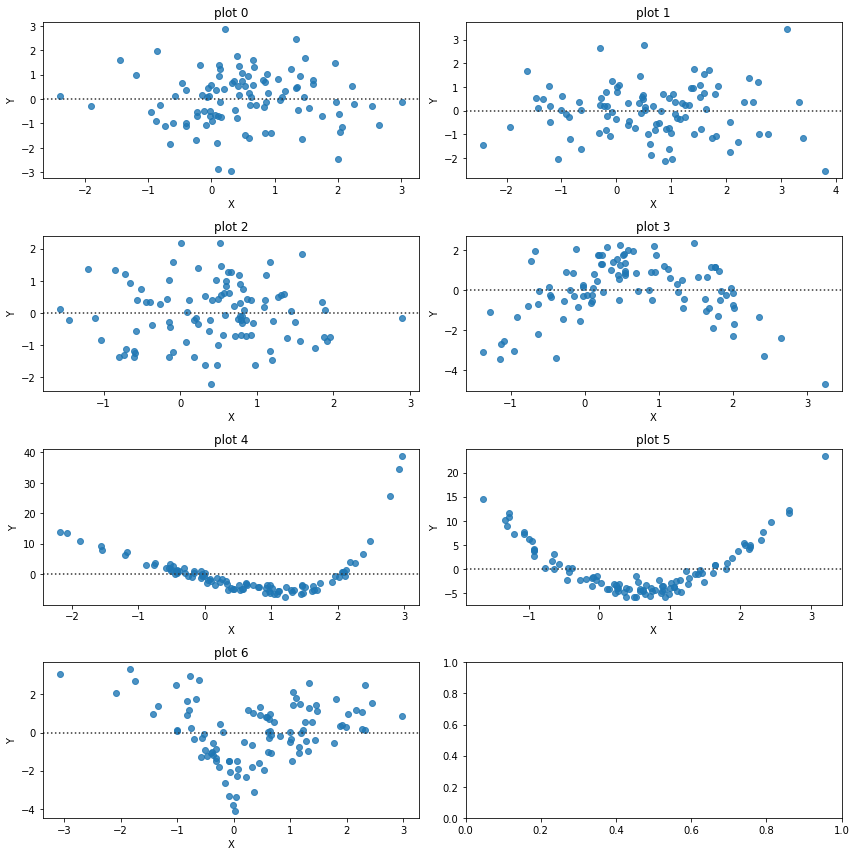

In [12]:
fig, axes = plt.subplots(4, 2, figsize=(12,12))

for k, v in datasets.items():
    ax = axes[k//2, k % 2]
    sns.residplot(data=v, x='X', y='Y', ax=ax)
    ax.set_title('plot %s' % k)
    
plt.tight_layout()

### Minimizing prediction error vs goodness of fit

While a regression line minimizes error among all linear models, it may be the case that a linear model may not be the best choice. In particular, 
1. a process, that's roughly linear, might have a lot of variance, making *any* predictor weak at best.
2. a process, that's nonlinear, may have small deviation from a line-of-best, making it possible that there is a better performing predictor to be discovered.

**Can you draw an example of this?**

While a linear approximation may be fine for the dataset in question, it leaves open the concern that the predictor may not generalize well to a different sample.

The table below contains the relevant information about the regression models for each dataset:
* `slope` of the regression line,
* `intercept` of the regression line, 
* `rvalue` (correlation coefficient), 
* `pvalue` is the result of the hypothesis test, with Null Hypothesis: "slope is zero".
* `stderr` is the standard error of the regression 
    - the standard deviation of the sampling distribution of slopes, under resampling the data.

Inspect the table to understand the values in terms of the plots above.

In [13]:
lms = pd.DataFrame()
for k, df in datasets.items():
    lm = linregress(df['X'], df['Y'])
    lms[k] = pd.Series(lm, index=lm._fields)
    
lms

,0,1,2,3,4,5,6
slope,0.126352,9.472078e-01,5.196914e+00,0.721379,7.107159e+00,0.565734,0.341205
intercept,5.120015,-4.241332e-02,-6.103533e-02,-0.611336,2.143024e+00,4.192567,-0.032108
rvalue,0.112739,7.356698e-01,9.774796e-01,0.434271,7.318504e-01,0.109662,0.230882
pvalue,0.264087,2.844506e-18,5.019001e-68,0.000006,5.183159e-18,0.277428,0.020827
stderr,0.112491,8.809600e-02,1.133362e-01,0.151150,6.685046e-01,0.517982,0.145251


### Heteroskedasticity: uneven variance of errors

* If a model has uneven variance of errors, then the quality of the predictions varies based on the input.
* The presence of heteroskedasticity may still allow for an unbiased estimate from the predictor.
* The presence of heteroskedasticity causes concern for the quality of the estimates among certain groups, as well as the models ability to generalize (e.g. how well do the predictions extrapolate?).

To check for heteroskedasticity, check for a correlation between the variable $X$ in each dataset and the *square of the residuals* of the regression. A non-zero correlation implies that there are uneven variance of errors. This test is roughly [White's Test](https://en.wikipedia.org/wiki/White_test).

In this question, use a significance level of 0.05.

In the function `heteroskedasticity`, return a Series indexed by dataset number (0-6) with boolean values that states if the dataset displays heteroskedasticity. **This function must be turned in**.

In [ ]:
# pseudo-code

# loop through datasets
    # create lm model - with X and Y
    # get slope and intercept
    # get preds
    # get errors
    # fit a lm model between X and errors**2
    # use p-value of this new model